In [40]:
import pandas as pd

In [44]:
df = pd.read_csv('../yield_df.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [45]:
df['Item'] = df['Item'].replace({'Cassava':0, 'Maize':1, 'Plantains and others':2, 'Potatoes':3, 'Rice, paddy':4, 'Sorghum':5, 'Soybeans':6, 'Sweet potatoes':7, 'Wheat':8, 'Yams':9})

/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_74033/2323293384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Item'] = df['Item'].replace({'Cassava':0, 'Maize':1, 'Plantains and others':2, 'Potatoes':3, 'Rice, paddy':4, 'Sorghum':5, 'Soybeans':6, 'Sweet potatoes':7, 'Wheat':8, 'Yams':9})


In [46]:
df = df.drop(['Unnamed: 0'], axis='columns')
low_counts = df['Area'].value_counts()
to_drop = low_counts[low_counts<100].index.tolist()
df_drop = df[~df['Area'].isin(low_counts)]
df = df.reset_index(drop=True)

In [47]:
df.head(10)


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1,1990,36613,1485.0,121.0,16.37
1,Albania,3,1990,66667,1485.0,121.0,16.37
2,Albania,4,1990,23333,1485.0,121.0,16.37
3,Albania,5,1990,12500,1485.0,121.0,16.37
4,Albania,6,1990,7000,1485.0,121.0,16.37
5,Albania,8,1990,30197,1485.0,121.0,16.37
6,Albania,1,1991,29068,1485.0,121.0,15.36
7,Albania,3,1991,77818,1485.0,121.0,15.36
8,Albania,4,1991,28538,1485.0,121.0,15.36
9,Albania,5,1991,6667,1485.0,121.0,15.36


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37
5,0,8,1990,30197,1485.0,121.0,16.37
6,0,1,1991,29068,1485.0,121.0,15.36
7,0,3,1991,77818,1485.0,121.0,15.36
8,0,4,1991,28538,1485.0,121.0,15.36
9,0,5,1991,6667,1485.0,121.0,15.36


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Item'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'hg/ha_yield'}>,
        <Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

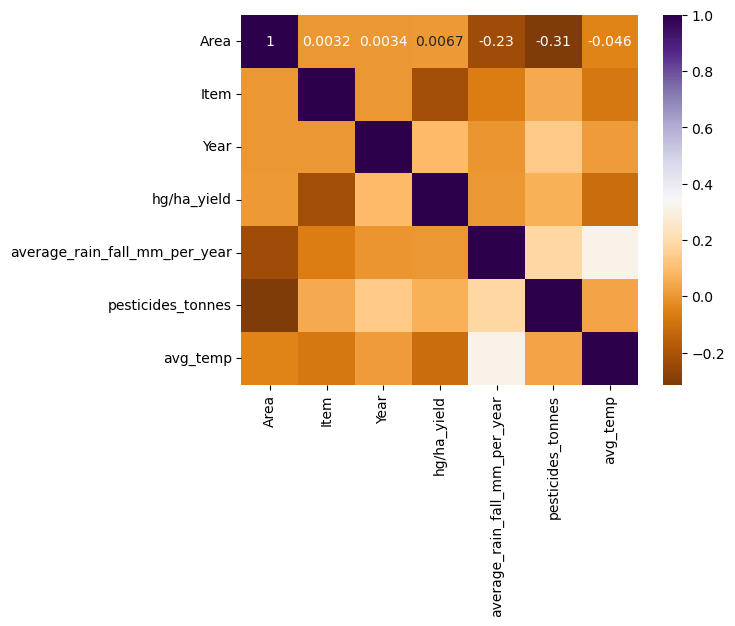

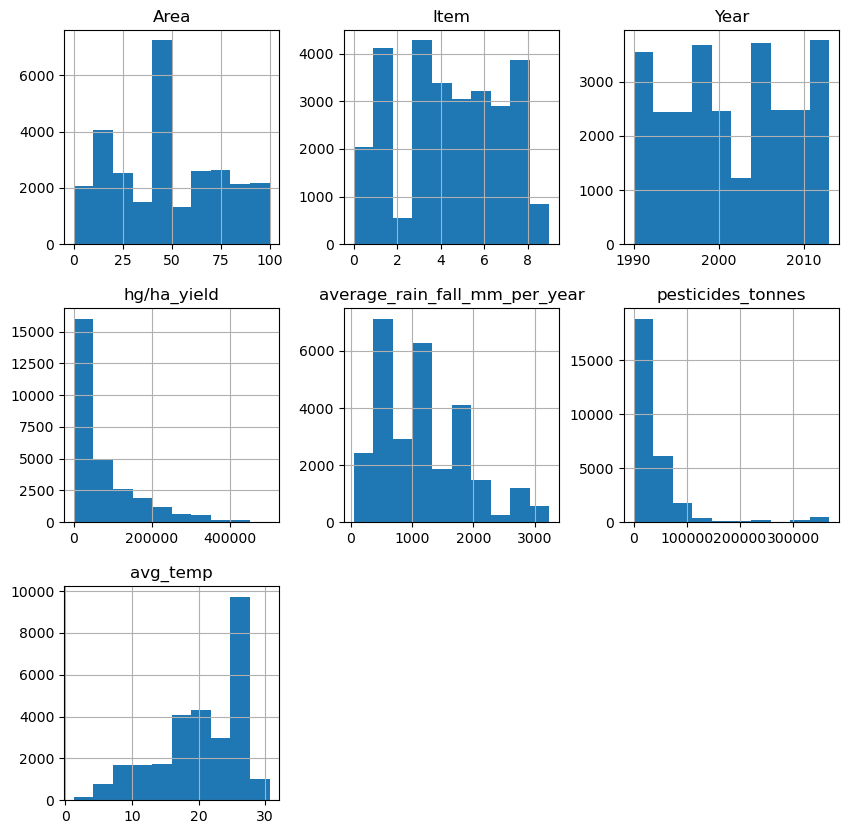

In [49]:
import seaborn as sns

sns.heatmap(df.corr(), annot= True , cmap='PuOr')

df.hist(figsize=(10,10))

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from math import sqrt


X_train = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y_train = df[['hg/ha_yield']]




In [42]:
df.head(20)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37
5,0,8,1990,30197,1485.0,121.0,16.37
6,0,1,1991,29068,1485.0,121.0,15.36
7,0,3,1991,77818,1485.0,121.0,15.36
8,0,4,1991,28538,1485.0,121.0,15.36
9,0,5,1991,6667,1485.0,121.0,15.36


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

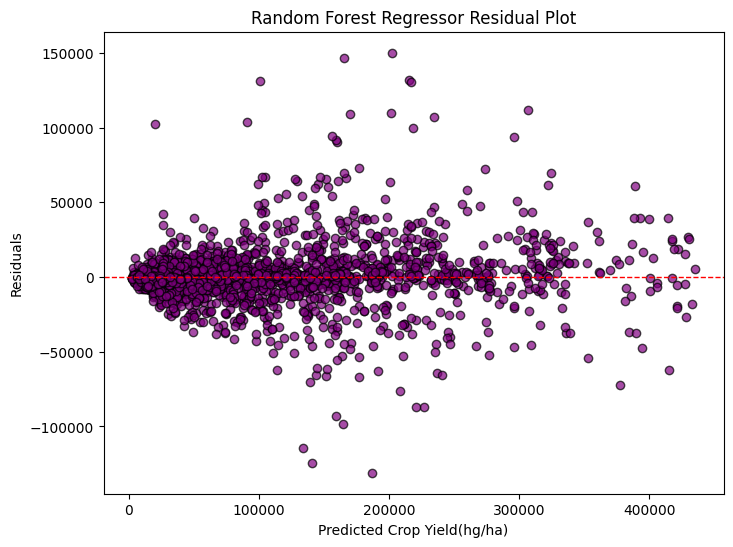

Random Forest Regressor Cross Validation R2 Scores: [0.96057491 0.96581419 0.95945364 0.96062105 0.96494864]
Random Forest Regressor Testing R2 Score: 0.97
Random Forest Regressor Test Data Root Mean Squared Error: 15562.49


In [45]:
#RANDOM FOREST REGRESSOR
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Make the Model
model = RandomForestRegressor(random_state=42, n_estimators=500,  criterion='squared_error', max_depth=20, max_features="log2")
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

#Train it on the whole training data
model.fit(X_train, y_train)

# Make predictions
test_predictions = model.predict(X_test)

#Print the stats
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)


residuals = np.array(y_test).flatten() - np.array(test_predictions).flatten()
plt.figure(figsize=(8, 6))
plt.scatter(test_predictions, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Crop Yield(hg/ha)")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor Residual Plot")
plt.show()

print(F"Random Forest Regressor Cross Validation R2 Scores: {scores}")
print("Random Forest Regressor Testing R2 Score: {:.2f}".format(test_r2))
print("Random Forest Regressor Test Data Root Mean Squared Error: {:.2f}".format(sqrt(test_mse)))


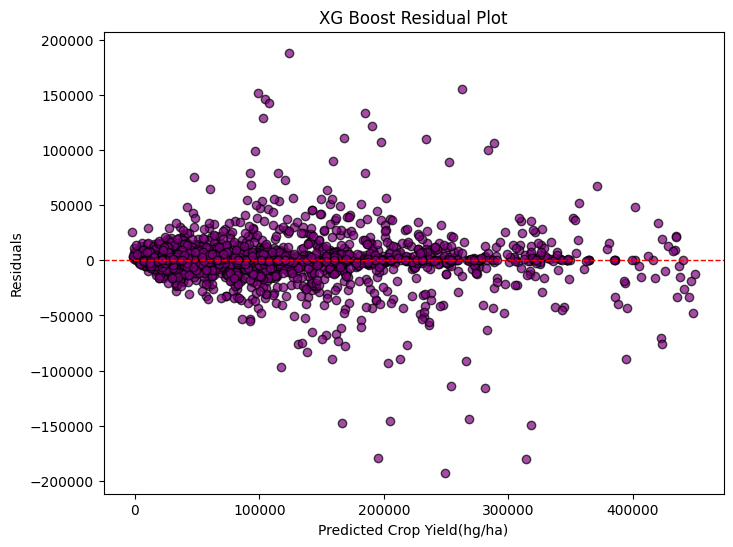

XG Boost Cross Validation R2 Scores: [0.96057491 0.96581419 0.95945364 0.96062105 0.96494864]
XG Boost Testing R2 Score: 0.96
 XG Boost Test Data Root Mean Squared Error: 17020.39


In [49]:
#XG Boost
xg_boost_model = XGBRegressor(random_state=42, n_estimators=1000, max_depth=10, learning_rate=0.1, gamma=0.3, reg_lambda=0.5,)

#Train it on the whole training data
xg_boost_model.fit(X_train, y_train)

# Make predictions
test_predictions = xg_boost_model.predict(X_test)

#Print the stats
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

residuals = np.array(y_test).flatten() - np.array(test_predictions).flatten()
plt.figure(figsize=(8, 6))
plt.scatter(test_predictions, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Crop Yield(hg/ha)")
plt.ylabel("Residuals")
plt.title("XG Boost Residual Plot")
plt.show()

print(F"XG Boost Cross Validation R2 Scores: {scores}")
print("XG Boost Testing R2 Score: {:.2f}".format(test_r2))
print(" XG Boost Test Data Root Mean Squared Error: {:.2f}".format(sqrt(test_mse)))



Model equation: y = -1480.11x + 107403.19
Testing R2 Score: 0.02
Mean Squared Error: 7131405898.15


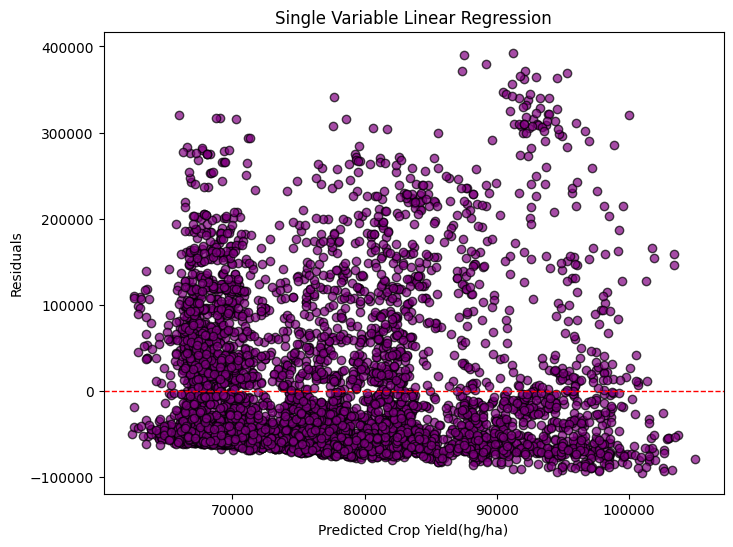

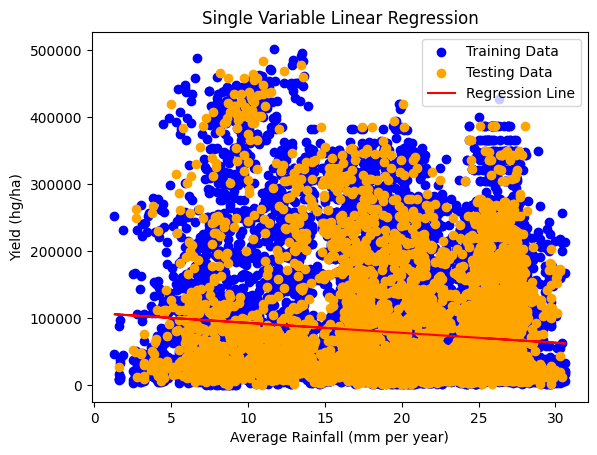

In [33]:
# Single Variable Linear Regression
X_train = df[['avg_temp']]
y_train = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

model.fit(X_train, y_train)

w = model.coef_[0][0]  
b = model.intercept_[0]

print(f"Model equation: y = {w:.2f}x + {b:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Testing R2 Score: {r2:.2f}')   

print(f"Mean Squared Error: {mse:.2f}")
residuals = y_test - y_pred

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Crop Yield(hg/ha)')
plt.ylabel('Residuals')
plt.title('Single Variable Linear Regression')
plt.show()

# Plot the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='orange', label='Testing Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Yield (hg/ha)')
plt.title('Single Variable Linear Regression')
plt.legend()
plt.show()



Model equation: y = -7707.10*Item + 104.19*Area + 3.09*average_rain_fall_mm_per_year + 0.12*pesticides_tonnes + -1857.17*avg_temp + 136372.67
Test R2 Score: 0.08%
Mean Squared Error: 6687860316.68


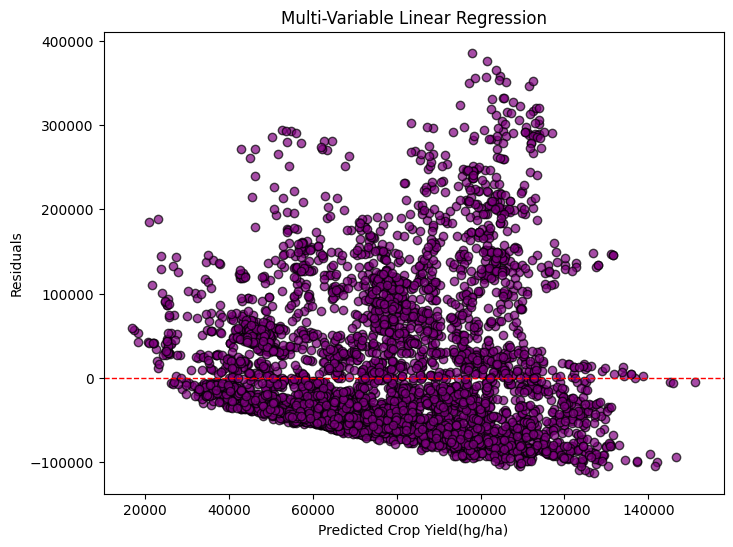

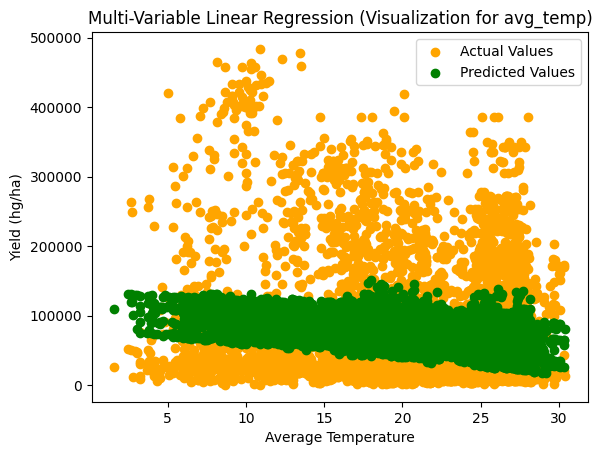

In [32]:
# Mutlivariable Linear Regression

X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

feature_names = X.columns
equation = "y = " + " + ".join([f"{coefficients[i]:.2f}*{feature_names[i]}" for i in range(len(coefficients))]) + f" + {intercept:.2f}"
print("Model equation:", equation)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Test R2 Score: {r2:.2f}%')
print(f"Mean Squared Error: {mse:.2f}")

residuals = y_test - y_pred

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Crop Yield(hg/ha)')
plt.ylabel('Residuals')
plt.title('Multi-Variable Linear Regression')
plt.show()


plt.scatter(X_test['avg_temp'], y_test, color='orange', label='Actual Values')
plt.scatter(X_test['avg_temp'], y_pred, color='green', label='Predicted Values')
plt.xlabel('Average Temperature')
plt.ylabel('Yield (hg/ha)')
plt.title('Multi-Variable Linear Regression (Visualization for avg_temp)')
plt.legend()
plt.show()


The accuracy of the Test Model is 0.83%
Mean Squared Error: 1256828460.34
R^2 Score: 0.83


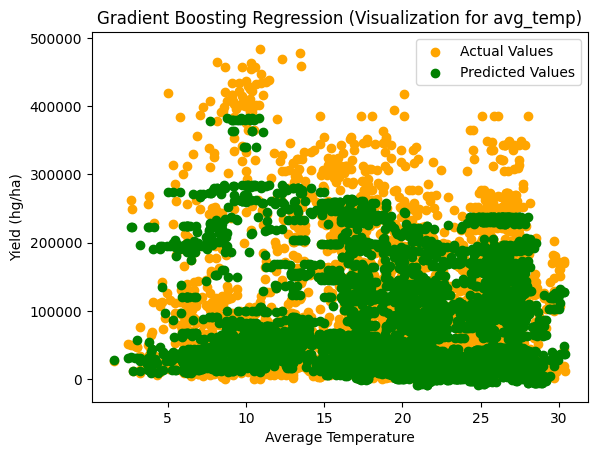

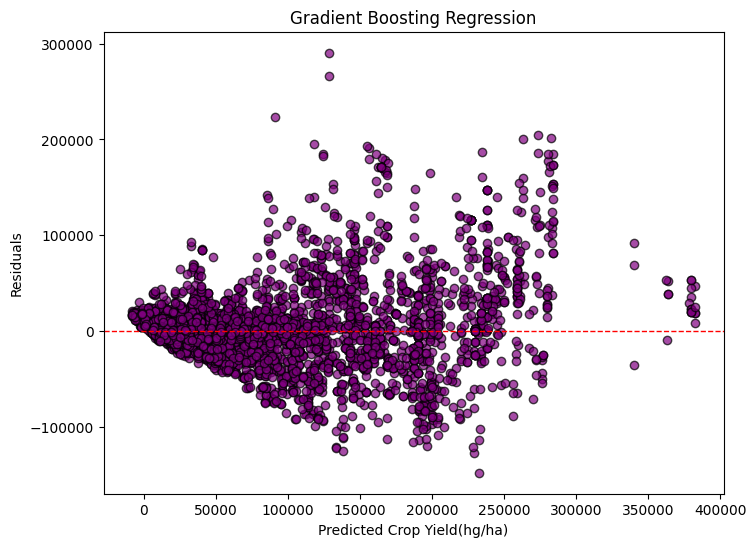

In [59]:
# Gradient Boost

X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'The accuracy of the Test Model is {r2:.2f}%')
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.scatter(X_test['avg_temp'], y_test, color='orange', label='Actual Values')
plt.scatter(X_test['avg_temp'], y_pred, color='green', label='Predicted Values')
plt.xlabel('Average Temperature')
plt.ylabel('Yield (hg/ha)')
plt.title('Gradient Boosting Regression (Visualization for avg_temp)')
plt.legend()
plt.show()

residuals = y_test.values.ravel() - y_pred  

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Crop Yield(hg/ha)')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Regression')
plt.show()


Epoch 1/500


2025-01-15 22:32:08.051285: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


565/565 [==============================] - 1s 1ms/step - loss: 9078908928.0000 - mae: 64782.3477 - val_loss: 6871967232.0000 - val_mae: 61568.5312
Epoch 2/500
565/565 [==============================] - 1s 1ms/step - loss: 6644385792.0000 - mae: 60981.9805 - val_loss: 6732928000.0000 - val_mae: 61717.8867
Epoch 3/500
565/565 [==============================] - 1s 1ms/step - loss: 6556732416.0000 - mae: 60873.3047 - val_loss: 6676339712.0000 - val_mae: 61367.1484
Epoch 4/500
565/565 [==============================] - 1s 1ms/step - loss: 6503942656.0000 - mae: 60676.9648 - val_loss: 6638860288.0000 - val_mae: 61329.4961
Epoch 5/500
565/565 [==============================] - 1s 966us/step - loss: 6465735168.0000 - mae: 60617.7656 - val_loss: 6621036032.0000 - val_mae: 60294.4375
Epoch 6/500
565/565 [==============================] - 1s 1ms/step - loss: 6448195072.0000 - mae: 60282.7930 - val_loss: 6591102976.0000 - val_mae: 60880.0234
Epoch 7/500
565/565 [==============================] - 1

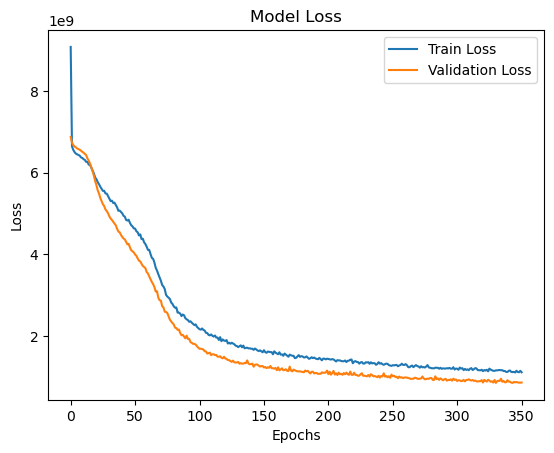

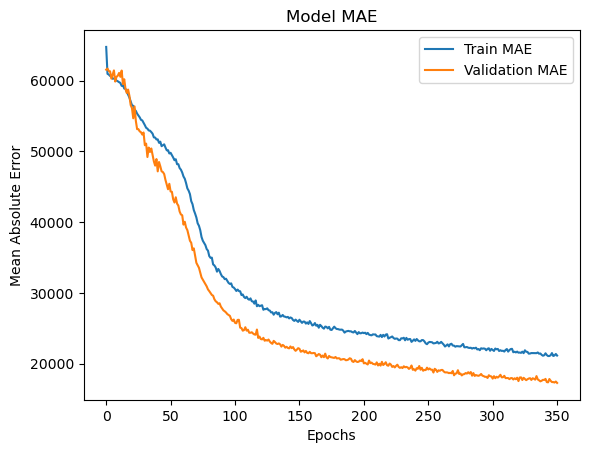

In [57]:
# Neural Network

X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(256, activation='relu',),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, verbose=1, callbacks=[early_stop])

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X_train)) * 100
test_r2 = r2 * 100

print(f"Train Score (R^2): {train_r2:.2f}%")
print(f"Test Score (R^2): {test_r2:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Neural Network')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


565/565 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13162743808.0000 - mae: 77374.5312 - val_loss: 13131377664.0000 - val_mae: 76478.4531
Epoch 2/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13224968192.0000 - mae: 77651.9688 - val_loss: 12362373120.0000 - val_mae: 74383.6875
Epoch 3/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11686495232.0000 - mae: 72736.0781 - val_loss: 10644963328.0000 - val_mae: 69343.0000
Epoch 4/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9880528896.0000 - mae: 66417.6953 - val_loss: 8292919808.0000 - val_mae: 61359.6797
Epoch 5/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7400881664.0000 - mae: 56841.5469 - val_loss: 6097936384.0000 - val_mae: 51618.0859
Epoch 6/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5441266688.0000 - mae: 47698.8633 - val_loss: 3315748096.0000 - val_mae: 38035.3867
Epoch 7/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3339927296.0000 - mae: 36693.0859 - val_loss: 1793893504.0000 - val_mae: 26

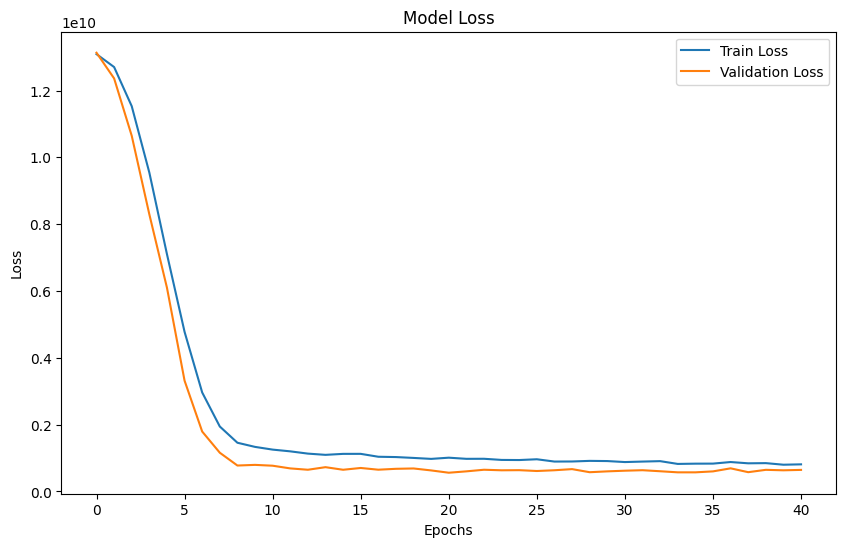

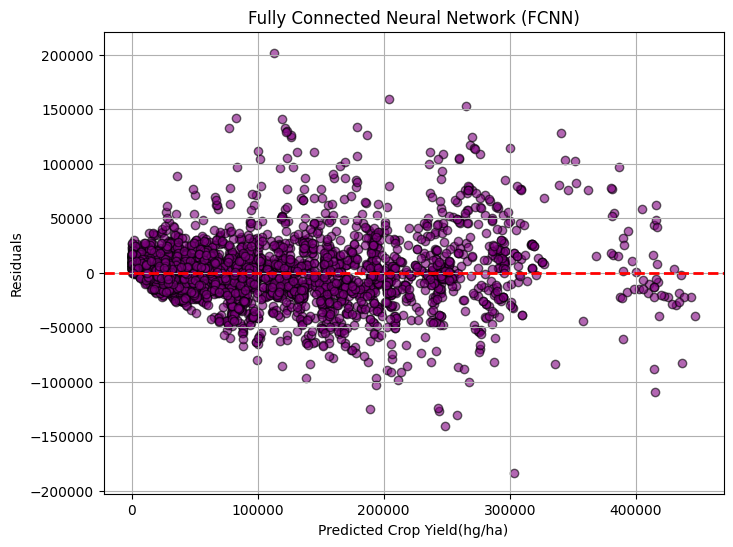

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# Prepare the data
X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dense(256, activation='relu', ),
    BatchNormalization(),
    Dense(128, activation='relu', ),
    BatchNormalization(),
    Dense(64, activation='relu', ),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, verbose=1, callbacks=[early_stop])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, model.predict(X_train))

print(f"Train R^2 Score: {train_r2:.2f}")
print(f"Test R^2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Residual plot
residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Fully Connected Neural Network (FCNN)')
plt.xlabel('Predicted Crop Yield(hg/ha)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
